In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

%matplotlib inline
plt.style.use('ggplot')    # 更改绘图风格， R语言绘图库的风格
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签

### 1. 初识数据

In [2]:
df = pd.read_csv('data/kelu.csv ')
df.info()
#  基本信息: 门票价格101，数据来自16年~19年，8K+多数据量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [3]:
df.describe()
#  根据平均分92, 和1/2分位得知, 大多数用户评分在100, 效果非常不错. 
# 16年~19年门票价格都是110


,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


### 2. 分析数据

    a1. 每天销量分析

<Axes: xlabel='time'>

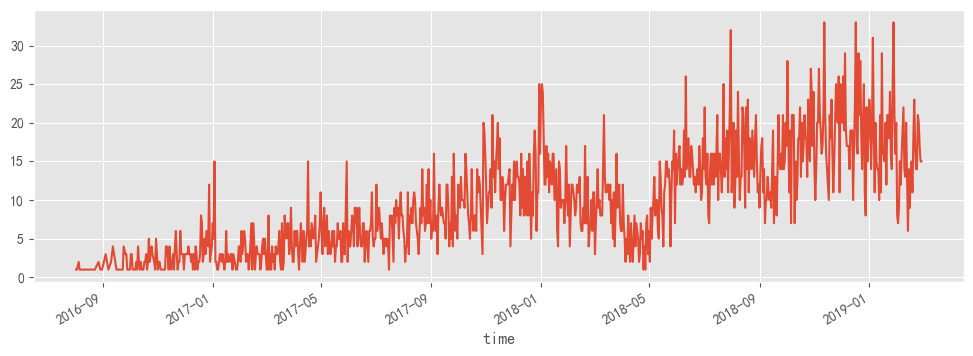

In [4]:
df['time'] = pd.to_datetime(df['time'], format='%Y/%m/%d')
df.groupby('time')['rating'].count().plot(figsize=(12, 4))

# 整体来看每日销量呈现上升趋势，但是在18年5月份前后(2, 3， 4)出现一次较大的波动，销量急剧下滑，猜测:极端天气，疫情
# 16年9月~17年1月，销量非常低，每天平均2-3张门票, 猜测： 101 观景台 刚开始营业, 知道的游客不多 

    a2. 每月销量分析

Text(0.5, 1.0, 'Monthly Sales Analysis between 16~19')

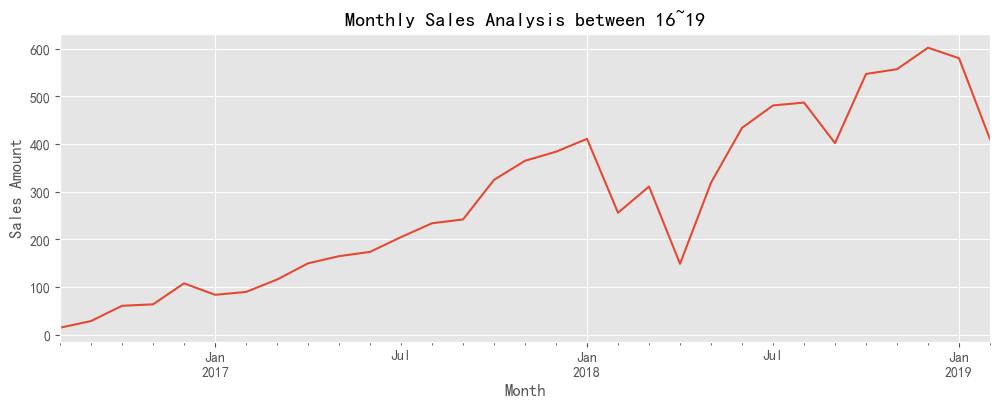

In [5]:
df['month'] = df['time'].values.astype('datetime64[M]')   # 保留月份精度的日期
df.groupby('month')['rating'].count().plot(figsize=(12,4))    # 按照月份精度进行计数
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Monthly Sales Analysis between 16~19') 

#  月份整体销量依然呈现上升趋势, 但是在18年2、3、4月份销量下滑明显。 跟每天销量下降有关。猜测:台风，疫情，运营推广不利

    a3. 每个用户的购买量和消费金额分析

In [6]:
# merge 用法, 相当于 sql 里的 join
df1 = pd.DataFrame({
    'name':['七七', '温蒂', '魈'],
    'group':['A', 'B', 'C']
})

df2 = pd.DataFrame({
    'name':['魈', '刻晴'],
    'group':['C', 'D'],
    'age':[18, 19]
})

pd.merge(left=df1, right=df2, on='name', how='inner', suffixes=('_left', '_right'))
#  left:左表  right:右表  on:关联字段 
#  how:inner〈默认值，交集)|outer(并集)|left(只保留左侧)|right(只保留右侧)
#  suffixes:如果两个表中有多个相同列，用suffixes给的值进行区分(默认值xy)


,name,group_left,group_right,age
0,魈,C,C,18


Text(0, 0.5, '消费金额')

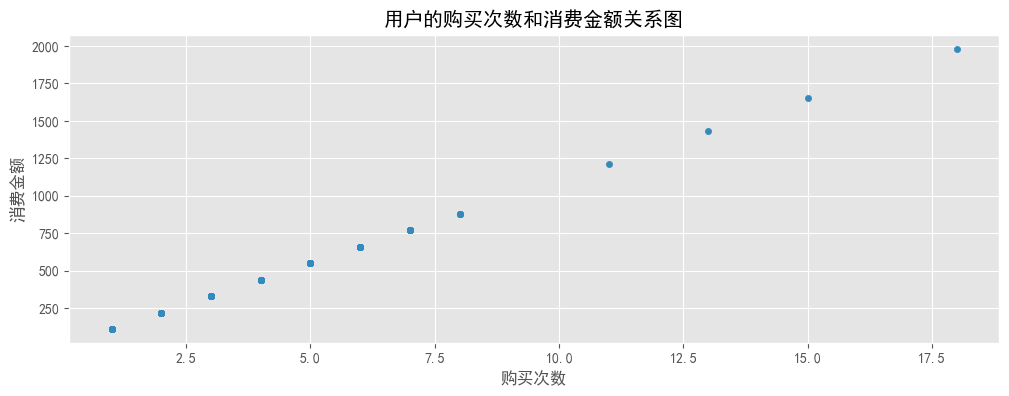

In [7]:
# 按照游客分组，统计每个游客的购买次数
import numpy as np
grouped_count_author = df.groupby('author')['frequency'].count().reset_index()

# 按照游客分组，统计每个游客的消费金额 
grouped_sum_amount = df.groupby('author')['amount'].sum().reset_index()
user_purchase_retention = pd.merge(left=grouped_count_author, 
                                   right=grouped_sum_amount,
                                   on='author',
                                   how='inner')
user_purchase_retention.plot.scatter(x='frequency', y='amount', figsize=(12, 4))
# plt.yticks(np.arange(0, user_purchase_retention['amount'].max(), 500))
plt.title('用户的购买次数和消费金额关系图')
plt.xlabel('购买次数')
plt.ylabel('消费金额')

#  结论: 斜率就是门票价格 110,  用户的消费金额和消费次数呈现线性关系

    b1.用户购买门票数量分析

Text(0.5, 1.0, '用户购买门票数量直方图')

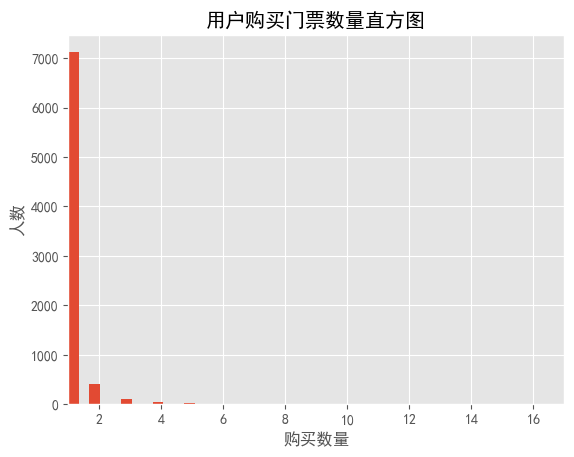

In [10]:
df.groupby('author')['frequency'].count().plot.hist(bins=50)
# bins 影响柱子的宽度，宽度=(最大值-最小值)/bins
plt.xlim(1,17)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买门票数量直方图')
# 绝大多数用户购买过1张门票，用户在7000左右
# 少数人购买过2~4张门票，猜测:  可能是台北周边用户

    b2. 用户购买门票2次及以上情况分析

Text(0.5, 1.0, '购买门票在2次以上的用户数量')

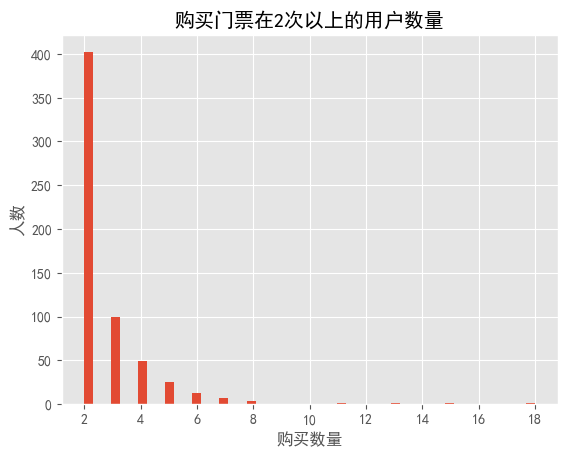

In [18]:
df_frequency_2 = df.groupby('author').count().reset_index()
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票在2次以上的用户数量')

# 消费两次的用户在整体上占比较大，大于2次的用户占小部分，用户购买次数最多为8次

    b3.查看2次及以上的具体人数

In [21]:
df_frequency_2 = df.groupby('author').count().reset_index()
df_frequency_2[df_frequency_2['frequency']>=2].groupby('frequency')['author'].count()

# 出去购买一次的顾客，可以看出购买2次有402人，购买3次的99人，以此类推得知 大多数人倾向于购买2~5

frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64